# Classification

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [23]:
data = load_iris(as_frame=True)
print(data.frame.head())
print(data.target_names)


df = pd.DataFrame(data.data, columns= data.feature_names)
df['species'] = data.target
df['species_name'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
['setosa' 'versicolor' 'virginica']


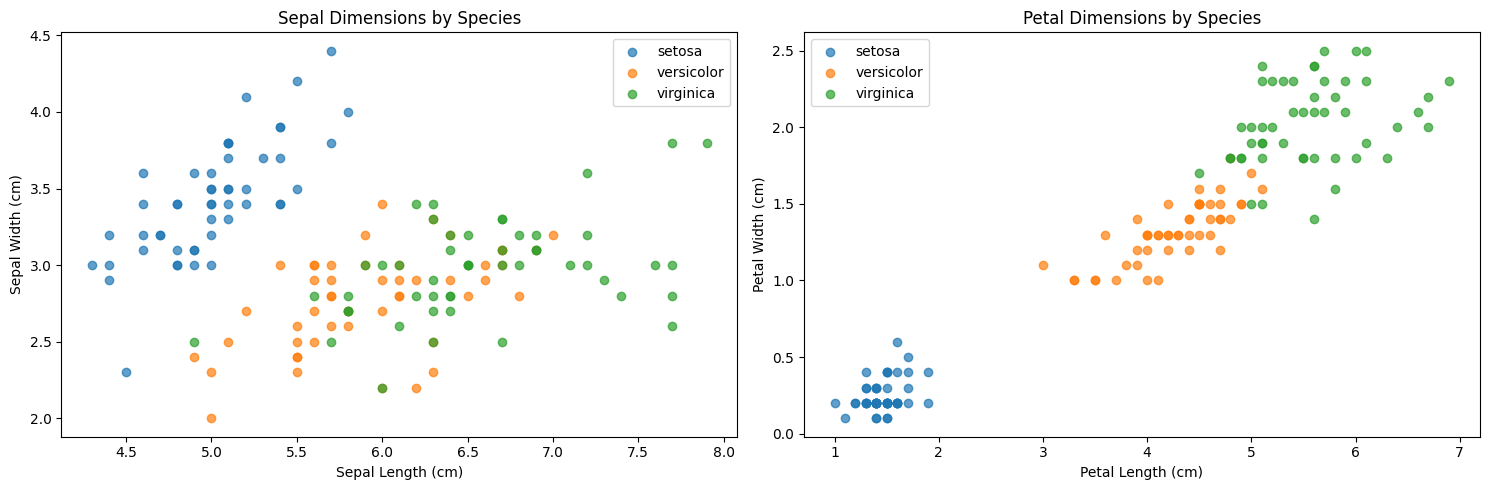

In [24]:
# Visualize the distribution of features by species
plt.figure(figsize=(15, 5))

# Plot 1: Sepal dimensions
plt.subplot(1, 2, 1)
for species in df['species_name'].unique():
    species_data = df[df['species_name'] == species]
    plt.scatter(species_data['sepal length (cm)'], 
                species_data['sepal width (cm)'], 
                label=species, alpha=0.7)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.title('Sepal Dimensions by Species')

# Plot 2: Petal dimensions
plt.subplot(1, 2, 2)
for species in df['species_name'].unique():
    species_data = df[df['species_name'] == species]
    plt.scatter(species_data['petal length (cm)'], 
                species_data['petal width (cm)'], 
                label=species, alpha=0.7)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()
plt.title('Petal Dimensions by Species')



plt.tight_layout()
plt.show()

Best params: {'lr__C': 1.0}
Test accuracy: 0.9111111111111111
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.82      0.93      0.88        15
           2       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45



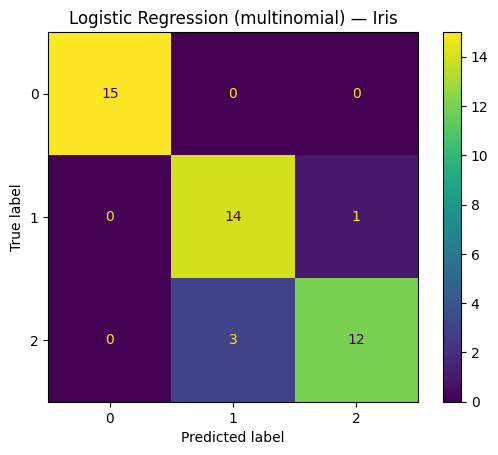

Classes: [0 1 2]
Coefficients shape: (3, 4)
Coefficients (per class):
 [[-1.07729095  0.95458815 -1.6995494  -1.60291044]
 [ 0.47337276 -0.44711131 -0.11640768 -0.79304707]
 [ 0.60391819 -0.50747684  1.81595708  2.39595751]]
Intercepts: [-0.33041014  1.78656701 -1.45615687]


In [25]:
X = data.frame.drop(columns=["target"]) 
y = data.frame["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("lr", LogisticRegression(
        solver="lbfgs", # Algorithm to use in the optimization problem
        max_iter=500,   # Maximum number of iterations taken for the solvers to converge
    ))
])

# Hyperparameter search over C ( C = 1/lambda )
param_grid = {"lr__C": [0.1, 1.0, 3.0, 10.0]} 
grid = GridSearchCV(
    pipe, 
    param_grid,
    cv=5, # 5-fold cross-validation
    n_jobs=-1 # Use all available CPU cores
    )
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
best = grid.best_estimator_

# Evaluate
y_pred = best.predict(X_test)
print("Test accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion matrix
disp = ConfusionMatrixDisplay.from_estimator(best, X_test, y_test)
plt.title("Logistic Regression (multinomial) — Iris")
plt.show()

# Inspect coefficients in the original feature space (after scaling)
lr = best.named_steps["lr"]
scaler = best.named_steps["scaler"]
print("Classes:", lr.classes_)
print("Coefficients shape:", lr.coef_.shape)   # (n_classes, n_features)
print("Coefficients (per class):\n", lr.coef_)
print("Intercepts:", lr.intercept_)